In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## LDA with extended data set to include other features than scores

In [2]:
class MF():
    
    def __init__(self, R, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.
        
        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """
        
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice
        #self.P = np.random.normal(size=(self.num_users, self.K))
       #self.Q = np.random.normal(size=(self.num_items, self.K))
        self.P = np.random.normal(scale=1.0/self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1.0/self.K, size=(self.num_items, self.K))

        #print()
        #print("matrix P")
       # print(self.P)
       # print()
       # print("matrix Q")
        #print(self.Q)
        #print()
         
        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])
        print()
        print("Overall Bias")
        print(self.b)
        
        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
              for j in range(self.num_items)
                  if self.R[i, j] > 0]
        # Perform stochastic gradient descent for number of iterations
        # print(self.samples)
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            print()
            print("Training_process")
            print(training_process)
            if (i+1) % 10 == 0:
               print("Iteration: %d ; error = %.4f" % (i+1, mse))
        
        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        print()
        print("SSE = ")
        print(np.sqrt(error))
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            #print(prediction)
            e = (r - prediction)
            #print(e , r, prediction)
            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
            # Update user and item latent feature matrices
            #print("before update")
            #print(i , j)
            #print(self.P[i, :])
            #print(self.Q[j, :])
            #print()
            self.P[i, :] += (self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:]))
            self.Q[j, :] += (self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:]))
            #print("After update")
            #print(self.P[i, :])
           # print(self.Q[j, :])
           # print()

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        print(prediction , i, j)
        return prediction
    
    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [3]:
df_1  = pd.read_csv("SVD_Data_27.csv")
df_1.shape

(27, 17)

In [4]:
df_1.head()

,Basic_Stats_Coverage_score,Inferential_Stats_Coverage_score,Statistical_Techniques_Coverage_score,Lin_Reg_Q _Coverage_score,Log_Reg_Coverage_score,DT_Coverage _score,NB_Coverage_score,SVM__Coverage_score,KM_Clustering_Coveragee_score,Basic_Stats_score,Inferential_Stats_score,Linear_Reg_score,Logistic_Reg_score,DT_score,NB_score,SVM_score,KM_Clustering_score
0,10,7,7,7,6,5,10,10,10,8,4,9,9,6,6,8,9
1,7,8,6,8,5,5,5,7,7,6,5,2,2,3,4,4,3
2,0,4,0,0,5,4,6,0,0,5,3,4,4,4,6,5,4
3,4,4,7,5,5,6,6,4,4,8,0,3,3,6,5,4,3
4,6,6,5,5,5,5,5,6,6,0,0,0,0,0,0,0,0


In [16]:
R=np.array(df_1 , dtype='long')
#A = np.array([10],dtype='int64')

In [5]:

mf = MF(R, K=7, alpha=0.1, beta=0.1, iterations=24)
training_process = mf.train()

print()
print("P x Q:")
print(mf.full_matrix())
print()
print("Global bias:")
print(mf.b)
print()
print("User bias:")
print(mf.b_u)
print()
print("Item bias:")
print(mf.b_i)
#print(R)



Overall Bias
4.89940828402
4.97034512275 7 16
4.98415690716 23 15
4.91075572069 13 11
4.93549391032 15 5
4.790473828 11 15
4.90092601471 1 9
4.67104929308 13 6
4.88395324313 5 5
4.79504453252 5 15
4.94035793774 12 12
4.54557215308 7 11
4.37092404482 13 15
4.91595225241 26 5
4.9664430875 22 1
4.83830687935 2 1
4.32562181455 15 11
4.9005213527 20 13
5.04455890586 17 13
4.75249981662 12 14
4.62843393662 2 15
4.33955571381 13 12
4.943763315 20 12
4.79521131939 15 0
4.29344410438 2 11
4.14608234899 22 11
5.02668260617 3 9
5.26317915058 20 8
5.04910426844 25 14
5.07105083218 20 6
4.64005337121 9 15
5.2374590316 2 9
5.03197425701 9 8
4.82491664042 12 0
4.10048911773 13 10
4.90845138919 9 12
4.80751466653 16 16
4.75780537781 10 1
5.1361683252 4 8
4.54096219944 16 7
5.23292286511 10 8
4.97824697987 25 12
4.92333544382 14 4
4.76213096952 11 0
4.48316928932 16 2
4.96828875072 8 6
5.011542577 7 14
4.48302720249 11 10
5.40479900869 26 8
4.68157843834 21 7
5.26519524971 0 9
4.94836947016 24 3
5.463

4.23591734473 3 8
4.62636747018 23 15
5.23575632529 4 3
3.47863632986 2 10
4.69781606423 14 9
4.39442752278 7 15
4.41020957685 24 11
5.47711950994 4 1
3.38567366151 2 12
3.7472921614 22 13
4.90595856437 5 2
5.09661375016 9 5
4.67269134845 24 0
4.16314549711 11 15
7.29710526602 10 3
3.89157680191 23 10
4.68658335463 15 9
5.69719178775 12 0
3.16557679093 14 15
4.03460050224 26 1
3.68861683896 26 3
4.77855626089 23 6
3.53645378125 15 1
4.40640123289 24 13
5.42192205238 8 4
3.32370154722 26 15
5.36129178238 20 13
5.9287504098 11 9
5.89647442128 12 14
7.22693305556 20 6
4.66621002878 11 3
3.95139067472 26 2
6.40109153975 10 2
5.89118251103 11 14
4.9925452825 24 7
3.77322735167 16 7
3.83990952715 9 12
6.77130722006 10 12
4.42593238718 3 3
3.30200509153 13 11
2.48452204113 26 12
4.88768906316 9 8
4.671958063 11 7
7.49618510752 10 11
7.66659504736 25 14
5.54228591571 1 8
7.42259556602 25 12
4.13356103383 2 15
7.41763709578 0 4
4.55880176199 23 1
2.70719652074 16 16
4.46730004979 18 1
2.9239841

4.96259949537 3 2
3.76008415124 1 11
3.54788003779 19 15
5.07884475342 24 1
5.24283351932 18 6
5.12838205279 26 13
3.57542722388 23 15
5.20158174619 17 6
5.19295747615 5 5
3.77173993316 19 1
4.70519162399 4 2
3.10417021199 15 6
5.61836992946 17 1
3.43288714217 19 12
5.97944752529 1 3
5.37117816921 9 8
4.3750661507 19 4
4.13858144819 22 2
2.99780548853 14 15
4.58192169744 24 13
6.46163832956 0 10
2.98253065047 23 16
5.57573897957 17 4
6.34102536254 23 14
2.86632945315 14 16
4.02952277734 16 1
6.73180047345 1 0
4.16855706542 16 3
4.65776740822 24 15
3.52684777047 21 2
5.39210895274 4 3
5.22184005847 12 16
5.25776463675 1 4
8.70001487889 25 9
5.580853678 12 0
4.32529909949 15 4
3.8659618894 17 12
3.90330032711 11 7
2.40476018539 21 7
6.1538257058 0 4
4.67366167924 2 13
4.18796371348 11 2
4.02475062023 3 15
3.46969084788 26 6
5.48591186994 2 6
5.13224782649 0 5
7.22578275227 1 1
4.53074723842 15 9
5.72055685421 2 9
4.50376216928 17 16
4.41194156096 1 13
6.21011556396 20 12
5.04807994917 11

6.23528951121 0 14
4.26573172811 1 15
5.24652043028 12 0
3.35347698232 16 10
3.92686193226 21 6
5.1569857004 12 14
5.67204337402 10 2
5.33640504573 12 8
2.41962819512 21 0
5.63460458836 24 6
4.18358048948 11 6
3.34748610312 16 11
5.38067661935 12 4
3.91797747683 3 16
6.58300785046 8 6
6.33031805606 11 9
6.26923056357 12 6
4.7112734636 24 15
4.9397389652 5 16
3.32527071451 16 7
8.9004276889 10 12
4.82801699985 2 4
5.06125308618 7 6
2.6695879619 16 12
6.00546605396 20 8
2.4758007455 13 11
4.90506285641 16 5
4.17338918934 16 2
6.18321129169 3 13
4.60832355386 22 4
5.38621018268 5 5
5.05115381975 18 6
4.83145776547 4 5
6.47462661308 1 3
6.54297078528 10 14
3.54727849832 17 12
4.13401188248 11 0
3.12810641063 3 12
5.50296797917 16 13
3.49629415626 11 8
4.43098834031 12 12
6.74356440558 1 2
5.02858878581 3 4
4.26897858822 2 1
5.97501369693 2 9
4.80846146348 19 13
4.88053924005 13 5
3.96639150842 9 16
8.66824469971 0 16
3.48637263528 7 16
4.69717198779 24 8
2.80707747631 26 1
4.012855113 22 2

5.39116958291 11 4
4.87872383604 5 16
4.16433192098 5 8
3.30551912138 16 0
5.31960780406 11 13
4.70709279376 4 2
4.42438291893 22 4
1.60355616965 13 12
6.28167227578 20 1
5.21971499658 17 5
4.55806036712 14 14
5.14897667944 2 6
2.50340122752 16 16
4.31455649527 24 13
7.12965590326 20 6
7.11084958253 23 13
2.3627997865 14 16
3.00983811111 7 12
5.28482777832 9 5
3.56507274689 23 16
4.35961101749 11 6
3.54855748051 11 3
5.10473429917 26 13
1.85555937112 23 1
4.49083571746 12 12
9.18665618101 25 6
4.15886157982 3 15
2.95353656367 13 15
3.00726529115 16 11
5.59726346337 7 9
3.04381481623 15 8
2.54042317143 22 16
4.46246811012 24 16
5.9571066963 5 1
5.01124045134 12 5
4.62668893886 13 14
5.38066389139 9 2
4.62578889701 5 3
5.10950300923 8 1
5.92136644941 9 7
4.02733403482 14 13
5.5284214259 26 9
4.07376683507 19 11
4.68463533236 26 3
4.87692318613 14 9
6.45082513797 1 8
5.00415779985 6 1
4.44018429451 17 16
5.6770660861 9 3
4.38065558234 14 5
6.85277164312 12 6
5.1005849592 23 6
3.6937305367

4.82050390317 22 13
3.87338468115 16 1
3.3967699644 16 0
2.65718236195 15 10
6.02575838949 5 4
4.44643937708 14 5
5.04262453695 4 6
6.21473833727 20 13
2.50725129274 11 1
4.76829683133 12 15
5.38941403676 12 8
2.70935994306 16 16
5.9541426277 9 9
8.45550986458 10 12
6.66830552118 20 1
2.75042876549 15 8
3.34449998661 16 8
5.56086655288 12 13
5.17402214893 2 14
5.61948673421 12 7
3.87092587837 24 15
2.90259765661 26 11
7.4869312893 12 9
5.40464202862 3 3
2.53904034624 16 12
4.72383877557 22 5
2.08183013209 15 16
2.99719873959 11 3
2.8738679962 13 11
4.7796804254 19 13
3.88857032832 2 1
4.09448665966 2 16
5.18637654101 19 6
4.07992792007 22 7
4.1848064031 9 15
5.77176391003 7 9
2.81674565057 21 2
5.5327223093 2 6
4.9747416858 26 2
4.49857100464 5 7
3.41968762713 14 6
2.87936876706 22 6
4.15901088674 16 2
5.03398302648 7 13
4.0991428419 19 5
5.76144669987 14 1
3.98643158502 1 6
3.97442299385 22 8
3.31375545495 26 1
3.96296337243 19 15
3.90416399917 24 11
8.40543435108 10 7
9.00967481412 2

2.02347243322 26 12
5.3888444362 12 5
3.45842328766 9 16
3.22582167103 21 3
2.62128127448 21 8
2.69493192029 1 12
5.6090772083 9 8
1.4879698159 23 1
4.75789753688 8 5
3.1888158238 11 8
4.70081400487 2 13
3.31831345794 19 1
3.86922548305 2 16
5.87288416291 12 8
5.0314900494 5 15
3.46341815112 22 2

SSE = 
8.07127288813

Training_process
[(0, 21.628813843737415), (1, 17.57700095594441), (2, 13.812144298961815), (3, 11.316382284373937), (4, 9.82957384936201), (5, 9.1748503111377921), (6, 8.5820149165961634), (7, 8.4536936494892139), (8, 8.0712728881282434)]
5.1086212646 25 1
4.84216780697 16 5
7.40427373978 12 9
4.82330587634 7 14
5.20740318793 4 6
5.03975684231 5 3
4.9053524998 18 6
5.52764220793 9 2
4.56259413291 11 6
5.88034320867 4 0
4.11830941723 24 15
5.43984716336 8 4
4.97821790309 2 4
4.12665831988 3 0
3.64535651834 16 15
8.69432301745 25 9
5.62551587418 24 1
6.44543957073 0 2
7.85272030896 0 9
3.66220807753 7 12
5.655806219 7 9
4.4750650652 24 5
6.51774671337 0 1
4.33722214007 9 

4.62087413065 14 5
3.48140065018 11 0
9.69005089859 0 0
2.39107219363 1 11
7.33634308057 23 13
4.71826477684 4 2
3.78782942737 24 2
5.53323711257 16 14
5.44316437036 12 14
4.44351131987 1 6
3.52428956507 23 9
5.87312665439 4 7
3.51731004598 7 11
4.08321771343 3 8
3.29841907304 19 1
1.9560000515 14 12
4.09793011217 22 11
5.75847756949 22 14
3.41759480569 16 0
6.33645258232 9 14
7.99074030416 25 15
4.98439163233 17 15
5.26743043829 12 16
8.39081499347 25 16
2.6263561997 15 2
4.06083747641 23 16
6.19771713612 15 14
6.02290852821 3 13
4.61782188333 22 4
3.31995028953 2 10
7.09043095669 11 9
9.64521467071 25 6
4.27804651175 2 5
5.25015286111 2 14
3.3239145729 26 11
4.31168493328 23 15
3.26414239503 19 12
2.74309363143 15 8
5.72575381069 16 9
2.88704203126 21 16
3.83332690788 20 2
3.26405138982 11 8
5.96729165688 5 1
4.66267527106 16 4
6.58519147109 3 2
2.61045889896 15 3
5.7288366258 3 14
3.32305977578 3 11
5.07586114389 0 10
5.41159613391 17 5
5.18363460881 23 6
3.75480552884 1 13
5.642270

4.897577117 1 15
5.1454241515 24 6
3.35511656043 26 15
6.36621275141 0 4
3.68382284033 7 15
10.210624493 0 6
4.05168260267 17 11
3.30229594858 19 16
5.80640788014 11 13
5.72088904269 5 4
5.85957065814 17 14
3.37162349578 11 8
2.63850807016 15 6
9.77739091642 0 7
5.58347153429 10 2
3.65658589816 13 6
7.42497972919 10 11
2.29156118022 21 8
4.30156754354 3 1
5.9337443806 14 1
6.10778612452 9 14
3.19147382837 14 10
5.97632717204 4 7
5.41321875522 25 1
3.10199942334 11 7
3.38269075796 26 8
6.69397564543 1 0
5.23895891272 0 5
2.78145131735 15 15
4.91805586433 14 9
4.86616838424 23 6
5.1461577921 23 4
4.77172895756 22 13
8.0805445288 0 11
3.5978393794 7 12
7.22087482721 3 9
3.17412276017 9 12
4.10054920573 15 5
4.28728411207 2 5
4.52835614807 16 3
3.47068570246 3 16
3.13146467763 11 3
3.12419959528 16 8
2.72286876943 15 8
2.77644117601 19 10
5.09190767741 4 6
3.96828485062 22 7
4.42163734295 1 10
5.43036125039 3 3
5.52630546722 9 8
4.76400675752 5 5
8.07846222101 10 16
3.82968298408 17 12
5.3

4.63836528299 4 2
5.97394512227 4 8
5.81160508709 17 1
3.44443859104 21 3
7.48800676357 0 15
2.00951857255 13 12
5.29016484629 10 2
4.06484770022 1 6
4.82837715818 15 4
6.25152862433 20 13
8.91631480231 25 6
5.57135726092 23 11
2.98900712249 2 10
4.96156699124 2 15
6.87235057406 25 13
2.66610213489 16 16
8.91722085019 25 11
2.88138960189 3 12
7.32097067619 11 14
2.89355897936 15 3
5.57600385325 4 3
3.50345749456 3 11
2.26989316584 15 1
4.33587217763 0 10
3.68956085946 26 6
3.2546246163 26 7
6.68021278582 0 1
6.50615572935 10 14
9.25388050678 10 6
4.82507767269 9 13
4.25911721722 16 1
3.3887714669 16 8
3.9911332965 17 12
4.98652433404 21 5
5.18141679067 19 6
3.4057471203 14 10
8.09443636869 10 16
3.88944895811 3 8
5.728370752 26 9
9.65712504857 0 8
3.4389554854 24 2
5.6950670809 20 11
4.92136108755 9 15
6.61107588828 1 7
4.12826650878 17 11
3.26756551274 26 1
5.12565407775 11 11
4.95146173721 18 6
5.81177002636 22 14
4.4807897965 24 12
5.4009510337 9 4
6.80063125647 1 8
4.09841639244 22

4.6491177153 8 5
4.44003171397 5 2
5.65490111034 9 0
4.40849574259 19 4
5.1274334187 4 4
3.62114402265 11 2
3.37488360091 14 15
9.12986752721 10 6
3.56549358654 24 15
3.79566521501 1 13
2.04230927929 1 12
4.69550114312 19 13
6.68519763322 25 13
3.28339518888 26 15
5.03616826623 26 13
2.6044667439 13 15
3.8591314312 24 3
4.22512407436 17 16
3.08802237158 11 0
4.22552333082 23 15
3.66288533565 21 15
4.05848552621 1 6
4.03565874229 16 1
6.49630723499 0 3
2.99228233789 7 11
5.1052252937 12 14
4.79981562951 20 2
9.65270109487 0 0
3.30369775412 9 12
3.53201820406 26 6
5.96099583478 5 6
3.81333792418 17 12
5.41472726828 20 15
3.60085790038 7 16
2.4567957737 21 0
4.35746130554 13 4
6.15954622997 1 2
5.43344248925 5 15
7.61018154632 10 11
8.77655885981 10 7
3.54356676687 26 1
7.19544305363 8 6
3.47054951941 3 16
4.6080219658 9 6
3.80769056803 22 8
4.49399418371 16 4
4.89317187867 9 13
3.58064080502 22 11
4.08155975879 3 0
5.02234782357 8 1
4.46862978308 26 4
7.5570591377 23 14
4.67851737971 24 

3.22248611059 26 6
5.06708751492 17 15
5.50409808056 22 14
4.56711039405 1 5
6.49932793107 25 13
4.64350185383 24 16
4.32575568404 24 12
9.4429491415 0 8
8.78932786972 10 8
3.72141724185 9 16
4.96386405156 6 1
5.55287622966 4 3
2.51291571607 1 12
4.32149390458 1 10
2.54837996163 21 2
3.14646908363 16 0
2.68306559338 15 7
6.28781101482 0 13
4.64550024274 8 5
4.21188391796 2 16
5.57303266128 12 2
1.75871016807 13 12
5.89521526896 0 14
3.8126909946 15 11
2.61132397811 22 6
2.46500131421 1 11
6.7965969906 20 1
5.71653426318 5 4
5.58782365268 10 2
2.30394773644 21 0
5.00259840931 24 14
2.29750121611 21 8
4.3563607579 19 4
5.26026650997 24 0
9.58703659442 0 6
5.22037850657 24 8
4.20473478485 5 2
5.80785825332 7 9
8.18701152284 0 12
9.00788401074 10 9
6.20286842503 7 6
8.61614243117 10 0
5.49368845421 20 11
3.9322838935 11 12
7.1662227675 0 3

SSE = 
6.9996036011

Training_process
[(0, 21.628813843737415), (1, 17.57700095594441), (2, 13.812144298961815), (3, 11.316382284373937), (4, 9.8295738

5.3680040988 12 13
3.85815938513 21 1
2.58888299472 13 15
4.64190777659 14 14
5.59947961279 7 9
4.32246216836 24 12
6.46112795315 5 1
4.93554411785 9 15
1.80316637948 26 12
3.27726086174 3 11
4.78410320327 19 6
8.77402019997 10 0
4.53871691754 12 12
4.42841732269 16 6
3.39658217531 26 15
4.52600085751 5 2
3.61211263967 9 16
7.32324211367 11 14
6.45507658183 1 0
5.15734506707 11 15
5.24499364767 4 6
4.843735047 14 4
4.39187746541 3 1
5.23194227998 24 8
3.44084432325 1 13
5.25877070246 24 6
4.70228001138 1 6
6.10557744479 26 14
9.86160474349 0 8
3.24806726693 16 0
3.83120832838 14 6
4.82605600737 16 4
3.08396542266 1 12
4.75307581274 26 13
5.18553810578 23 4
4.83871463556 16 5
4.02668361958 22 8
2.80085287514 26 6
4.68229548333 15 4
4.78538031249 18 6
5.89998416027 17 1
5.18368900413 5 3
6.53908854634 10 14
5.53870682903 12 2
6.42182482479 1 2
5.30823071673 3 4
4.83534089343 13 5
4.64327975659 19 4
5.38798580756 11 5
3.0539350567 16 11
7.06654519675 1 3
5.07221948766 7 13
5.13135261423 2

3.23642426963 11 3
3.01468452493 21 2
5.64575692366 12 5
6.01658067782 20 8
5.36262478115 24 6
6.44869294055 25 13
3.88193323448 15 11
4.23229693085 12 15
4.21164673306 9 10
2.73090039863 15 7
4.05089636906 2 16
5.22191043581 2 14
5.67015458826 9 0
5.02066320171 17 15
5.98645532861 4 0
1.77779866915 15 12
5.52108863121 5 15
3.27101547154 21 3
6.13946640846 15 14
3.93639375733 22 1
4.93163532232 24 4
3.9041473722 12 11
3.84001350876 17 12
5.10524253194 7 14
4.45781812128 22 4
8.71992559819 10 0
6.79832154926 0 3
6.64816741256 12 9
8.70473039216 10 8
5.57182823022 19 9
4.21773993258 24 12
2.02762457618 14 11
5.28454351759 4 6
5.74348912761 17 4
4.56211396892 1 15
3.43795931193 26 11
3.16621972064 2 10
4.44323514092 13 4
4.61426920738 14 4
5.40743820807 2 6
4.6860234128 11 10
5.36401418793 4 3
4.22072337799 2 11
3.77044720534 21 15
3.21356394704 26 1
3.64005678779 7 12
2.64043847257 16 12
5.44671714118 16 14
5.4427843703 11 5
3.91471780376 22 7
4.20826028926 20 3
4.84722572979 13 5
5.5180

5.96235083215 12 8
4.0368455814 23 16
3.35983988898 11 8
5.14421700962 17 6
6.24744114054 10 14
3.18942785699 15 10
8.7194463997 25 15
5.64094092214 10 1
5.09171370621 4 6
4.38287834701 20 3
8.43506638143 0 11
4.5903905721 19 15
3.26745022312 7 11
5.41536961257 19 9
3.18784488877 26 0
4.89780921365 24 8
5.99513104758 20 0
5.17824547246 11 4
7.96615106099 25 14
2.16722012142 22 12
3.08956145158 21 3
4.13581412435 21 6
3.0212662066 11 7
4.50189561538 11 15
3.48878999393 16 15
4.5221952258 24 5
2.44079788553 15 3
8.31585181171 10 12
4.98320483154 17 15
2.81939825331 13 10
5.01723276509 16 13
4.1760510662 23 15
4.89924639539 2 15
4.16811319729 17 10
4.02692538423 2 16
1.74349546589 15 1
4.91973277551 24 4
7.6054549794 10 11
3.34744678526 24 2
4.92300206614 12 3
5.14252779446 13 14
3.85224147267 14 13
5.12697038511 12 16
2.70529826668 22 16
6.58485407966 12 6
3.84526237521 22 7
5.62500622196 2 6
5.09364404613 13 13
3.92974362464 22 1
3.94036941372 5 8
4.00525098155 17 12
2.69265187946 16 12

3.05866686274 14 10
5.50287610017 9 4
2.5099690335 15 2
5.60922670766 10 2
2.79311162656 22 6
1.35003660088 23 1
2.72027704462 15 6
6.40400986498 0 14
3.69793985826 26 11
3.11691846328 9 12
5.06348564772 26 13
2.50975700257 16 12
5.95788265832 4 0
7.18579629344 1 3
5.18149143042 18 6
5.30174369722 17 6
5.22796047377 2 4
5.01173958538 0 10
8.5147805028 25 9
2.85692516697 3 12
8.92410960871 25 12
2.66322774531 15 3
3.89047133696 2 1
9.47842873463 0 0
4.20646381075 15 5
3.51540358355 11 7
8.36712197692 10 12
5.48563723869 4 3
4.05041581809 5 8
9.26081688001 25 11
5.54108554337 16 14
3.42224493555 7 11
6.95248876925 20 12
7.59423220409 11 9
6.03015198408 20 0
3.44599983465 14 15
6.39442350608 0 2
7.06034895235 0 3
5.20722698763 12 14
5.51503947178 9 5
6.25887592379 5 6
5.70656529966 17 1
4.96432116033 5 3
6.06337998009 20 14
5.71214370126 22 14
7.64849165502 0 9
7.69002276051 25 15
7.34783042388 10 15
3.39784829761 26 0
6.20207322645 26 14
4.35571252394 26 3
5.6415321625 3 14
5.1784244463 

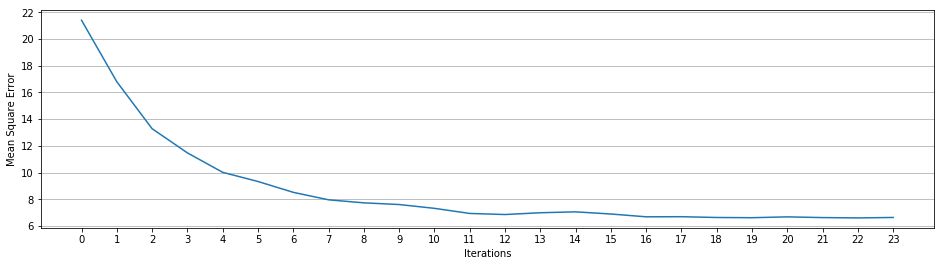

In [6]:
x = [x for x, y in training_process]
y = [y for x, y in training_process]
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")

In [3]:
from scipy.sparse.linalg import svds

In [21]:
matrix = np.random.random((20, 10))
num_components = 2
u, s, v = svds(matrix, k=num_components)
X = u.dot(np.diag(s))

In [29]:
matrix = np.array(df_1, dtype='float')

In [30]:
matrix.shape

(27, 17)

In [58]:
num_components = 7
u, s, v = svds(matrix, k=num_components)

In [59]:
original = u.dot(np.diag(s)).dot(v)

In [60]:
matrix[4]

array([ 6.,  6.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

 [  5.93312461   5.84277819   4.76791431   5.20325187   5.14161833
    4.92207141   5.09298349   5.95280037   5.83193099   6.18088875
    4.46026422   4.31664582   4.052271     4.9227417    5.29446352
    4.1221569    4.6896583 ]

In [61]:
original[4]

array([ 5.75528009,  6.07016969,  5.38951518,  5.55693977,  4.66340347,
        4.69708148,  5.02540012,  5.75528009,  5.75528009, -0.48857054,
        0.50944471, -0.40788504, -0.45996622,  0.50743765,  0.19721446,
        0.23490986,  0.49224333])

In [74]:
from sklearn.utils.extmath import randomized_svd

u, s, v = randomized_svd(matrix, 
                              n_components=7,
                         flip_sign=True,
                              random_state=100)

In [75]:
reconstructed = u.dot(np.diag(s)).dot(v)

In [78]:
reconstructed[4]

array([ 5.75528009,  6.07016969,  5.38951518,  5.55693977,  4.66340347,
        4.69708148,  5.02540012,  5.75528009,  5.75528009, -0.48857054,
        0.50944471, -0.40788504, -0.45996622,  0.50743765,  0.19721446,
        0.23490986,  0.49224333])

In [97]:
from sklearn.decomposition import randomized_svd


u, s, v = randomized_svd(matrix, 
                              n_components=7,
                         flip_sign=False,
                              random_state=100)

In [98]:
reconstructed2 = u.dot(np.diag(s)).dot(v)

In [102]:
matrix[1]

array([ 7.,  8.,  6.,  8.,  5.,  5.,  5.,  7.,  7.,  6.,  5.,  2.,  2.,
        3.,  4.,  4.,  3.])

In [101]:
reconstructed2[4]

array([ 5.75528009,  6.07016969,  5.38951518,  5.55693977,  4.66340347,
        4.69708148,  5.02540012,  5.75528009,  5.75528009, -0.48857054,
        0.50944471, -0.40788504, -0.45996622,  0.50743765,  0.19721446,
        0.23490986,  0.49224333])

In [108]:
from numpy.linalg import svd
import numpy as np

u, s, v = svd(matrix, full_matrices=False)

In [109]:
print(u.shape, s.shape, v.shape)

(27, 17) (17,) (17, 17)


In [111]:
reconstructed3 = u.dot(np.diag(s)).dot(v)

In [113]:
matrix[4]

array([ 6.,  6.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [112]:
reconstructed3[4]

array([  6.00000000e+00,   6.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   6.00000000e+00,   6.00000000e+00,
        -7.90760060e-15,  -1.29436643e-15,  -2.58901744e-15,
        -4.65358842e-15,  -3.21909037e-15,  -5.56594881e-15,
        -3.28529505e-15,  -8.88178420e-16])